# B. Khám phá dữ liệu

## 1. Đọc dữ liệu và tính số dòng, số cột

Import các thư viện cần thiết

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

Đọc file `DataScientist.csv` và in ra 5 dòng đầu tiên

In [159]:
df = pd.read_csv('archive/DataScientist.csv',index_col='index')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
index,,,,,,,,,,,,,,,,
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\r\n\r\nAt Hopper, we’re on a miss...",3.5,Hopper\r\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\r\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\r\n\r\nhttps://www.decode-m.com/\r\n\...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\r\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\r\nDescripti...",3.4,United Entertainment Group\r\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


Tính số dòng và số cột và lưu vào 2 biến `num_rows`, `num_cols`

In [160]:
num_rows,num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')


Number of rows: 3909
Number of columns: 16


## 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

## 3. Dữ liệu có dòng nào bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương `duplicated()` và `any()` trên dataframe `df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu không có dòng bị lặp.

In [161]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

Như vậy, dữ liệu không có dòng nào bị lặp

## 4. Tỉ lệ giá trị thiếu của mỗi cột

Ta cần xem xét đến các giá trị thiếu trong dữ liệu. Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức `isnull()` trên dataframe `df` và tính tổng số giá trị thiếu của từng cột bằng phương thức `sum()`. Cuối cùng ta chia số dòng và lưu kết quả vào `missing_ratio`.

In [162]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio

Unnamed: 0           0.0
Job Title            0.0
Salary Estimate      0.0
Job Description      0.0
Rating               0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Founded              0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Revenue              0.0
Competitors          0.0
Easy Apply           0.0
dtype: float64

Có thể thấy, dữ liệu thiếu ở mỗi cột đều là 0.

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()` trên dataframe `df`.

In [163]:
df.describe()

,Unnamed: 0,Rating,Founded
count,3909.000000,3909.000000,3909.000000
mean,1954.000000,3.283576,1479.154771
std,1128.575429,1.575749,855.750138
min,0.000000,-1.000000,-1.000000
25%,977.000000,3.200000,1625.000000
50%,1954.000000,3.700000,1976.000000
75%,2931.000000,4.100000,2002.000000
max,3908.000000,5.000000,2020.000000


## 5. Kiểu dữ liệu của mỗi cột? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý tiếp không?

In [164]:
col_dtype = df.dtypes
col_dtype

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

#### Nhận xét
- Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp, nên không cần phải xử lý.

## 6. Mỗi cột có ý nghĩa gì?

Đầu tiên, ta có thể thấy cột 'Unnamed: 0' không có ý nghĩa trong df. Do đó, để làm gọn dataframe để dễ quản lý, ta cần bỏ cột này

In [165]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
index,,,,,,,,,,,,,,,
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\r\n\r\nAt Hopper, we’re on a miss...",3.5,Hopper\r\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\r\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\r\n\r\nhttps://www.decode-m.com/\r\n\...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\r\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\r\nDescripti...",3.4,United Entertainment Group\r\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


## 7. Với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu số, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Bạn sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

In [166]:
data = {
    "row_name" : ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
}
col_name = []
for i in df.columns:
    if (df[i].dtypes == 'float64') or (df[i].dtypes == 'int64'):
        col_name.append(i)

for i in col_name:
    _data = []
    missing_data = df[i].isna().sum()
    _data.append((missing_data / len(df[i]) * 100).round(1))
    _data.append(df[i].min())
    percentile = df[i].quantile([0.25,0.5,0.75])
    _data.append(percentile[0.25])
    _data.append(percentile[0.5])
    _data.append(percentile[0.75])
    _data.append(df[i].max())
    data[i] = _data
num_col_info_df = pd.DataFrame(data).set_index('row_name')

In [167]:
num_col_info_df

,Rating,Founded
row_name,,
missing_ratio,0.0,0.0
min,-1.0,-1.0
lower_quartile,3.2,1625.0
median,3.7,1976.0
upper_quartile,4.1,2002.0
max,5.0,2020.0


**Có giá trị không hợp lệ trong mỗi cột không? (không xét giá trị thiếu)**


## 8. Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

# 9. So sánh doanh thu giữa các lĩnh vực: 

### Liệt kê danh sách tất cả các lĩnh vực có trong datadrame: 

In [168]:
def create_df(): 
    df = pd.read_csv('archive/DataScientist.csv',index_col='index')
    return df
df = create_df();
compare_sector = df['Sector']
pd.unique(compare_sector)
    

array(['Travel & Tourism', 'Consumer Services', '-1',
       'Information Technology', 'Business Services', 'Insurance',
       'Finance', 'Retail', 'Media', 'Restaurants, Bars & Food Services',
       'Agriculture & Forestry', 'Non-Profit', 'Education', 'Government',
       'Health Care', 'Oil, Gas, Energy & Utilities',
       'Accounting & Legal', 'Manufacturing', 'Real Estate',
       'Biotech & Pharmaceuticals', 'Arts, Entertainment & Recreation',
       'Aerospace & Defense', 'Construction, Repair & Maintenance',
       'Transportation & Logistics', 'Telecommunications',
       'Mining & Metals'], dtype=object)

### Tạo 1 dataframe mới bao gồm tên lĩnh vực và doanh thu của mỗi lĩnh vực:

In [169]:
compare_sector = df[['Sector','Revenue']];
(compare_sector.Sector)

index
0                Travel & Tourism
1               Consumer Services
2                              -1
3          Information Technology
4               Business Services
                  ...            
4375       Information Technology
4376       Information Technology
4377            Business Services
4378           Accounting & Legal
4379    Biotech & Pharmaceuticals
Name: Sector, Length: 3909, dtype: object

### Ta thấy dữ liệu của cột doanh thu (Revenue) còn chưa xử lý nên tiếp theo ta phải xử lý dữ liệu ở cột này: 

#### Đầu tiên ta cần loại bỏ các lĩnh vực không xác định-các lĩnh vực có giá trị -1: 
#### Tiếp đó ta sẽ convert loại dữ liệu này sang kiểu số để có thể so sánh doanh thu của từng lĩnh vựa.

In [170]:

def del_null_Sector_col(df):
    df =df[df['Sector'] !='-1']
    return df

#### Đầu tiên ta cần loại bỏ các lĩnh vực không thống kê được doanh thu ('Unknown/Non-Applicable'):

In [171]:
def del_null_Revenue_col(df): 
    df =df[df['Revenue'] !='Unknown / Non-Applicable']
    df = df[df['Revenue'] !='-1']
    df = df.reset_index(drop=True)
    return df

def get_size_col(df_col):
    return df_col.size;

### Bây giờ chúng ta cần phải sử lí dữ liệu ở cột doanh thu(Revenue). Chúng ta cần đổi dữ liệu trong cột này thành kiểu numeric thay vì object như hiện giờ.
#### Đối với các cột có doanh thu là 'A to B' thì chúng ta sẽ lấy trung bình cộng của chúng và với các cột có dữ liệu là 'A+' thì chúng ta sẽ lấy giá trị đó - bớt 0,2 nếu nó <1 và -.5 nếu nó lớn hơn 1.

In [245]:
#chọn 2 cột Sector và Revenue
def create_select_df(df):
    select_df = df[['Sector','Revenue']];
    select_df = del_null_Sector_col(select_df);
    select_df = del_null_Revenue_col(select_df);
    return select_df;
#xứt lí xóa đơn vị trong cột Revenue
def _Revenue_Unit_processing(s):
    position = s.find('million');
    unit='million';
    if(position==-1): 
        position =s.find('billion');
        unit='billion';
    return position,unit;
#xử lí các tiền tố '+','less than' và cắt 'to' đối với giá trị trong cột Revenue
def handle_Revenue(s): 
    s=s.replace('$','');
    s=s.replace('to','');
    if ('Less than' in s): 
        s= s.replace('Less than','')
        if ( float(s) <=1 ): 
            s= str(float(s)-0.2)
        else: s= (str(float(s) -0.5));
    if ('+' in s): 
        s=s.replace('+', '')
        if(float(s)<=10): 
            s = str(float(s) + 0.2)
        else: s = (str(float(s) +0.5))
    return s
#tính trung bình nếu giá trị trong cột Revenue là 'to'
def avg_Revenue(s): 
    a=[]
    s=s.split('  ')
#     print(s)
    s = list(map(float,s))
    if (len(s)>1):
        s= ((s[0] + s[1])/2);
        return s
    return s[0]

compare_sector = create_select_df(df);
unit_col = [];
size = get_size_col(compare_sector.Revenue)
# print(compare_sector.Revenue)
for i in range(size): 
    position,unit = _Revenue_Unit_processing(compare_sector.Revenue[i]);
    unit_col.append(unit)
    compare_sector.Revenue[i] = compare_sector.Revenue[i][:position]
    compare_sector.Revenue[i] = handle_Revenue(compare_sector.Revenue[i])
#     print(compare_sector.Revenue[i])
    compare_sector.Revenue[i] = avg_Revenue(compare_sector.Revenue[i])
compare_sector['Unit(USD)'] = unit_col
compare_sector.loc[compare_sector['Unit(USD)']=='billion', 'Revenue'] = compare_sector.Revenue *1000
del compare_sector['Unit(USD)']

# Gộp các sector trùng lại và lấy Revenue là trung bình doanh thu của tất cả các sector đó:

In [246]:
compare_sector.Revenue= compare_sector.Revenue.astype('float32',errors='ignore')
df2 = compare_sector.groupby('Sector')[['Revenue']].mean().sort_values(['Revenue'],ascending=False).head(10)
df2


,Revenue
Sector,
Insurance,7812.368652
Media,5967.073242
Finance,5552.650391
Aerospace & Defense,5363.799805
Biotech & Pharmaceuticals,4859.544434
Telecommunications,4653.026367
Retail,4593.634277
Manufacturing,4527.015137
"Oil, Gas, Energy & Utilities",4202.260742


# Vẽ biểu đồ cột biểu thị doanh thu của mỗi sector đối với top 10 sector:

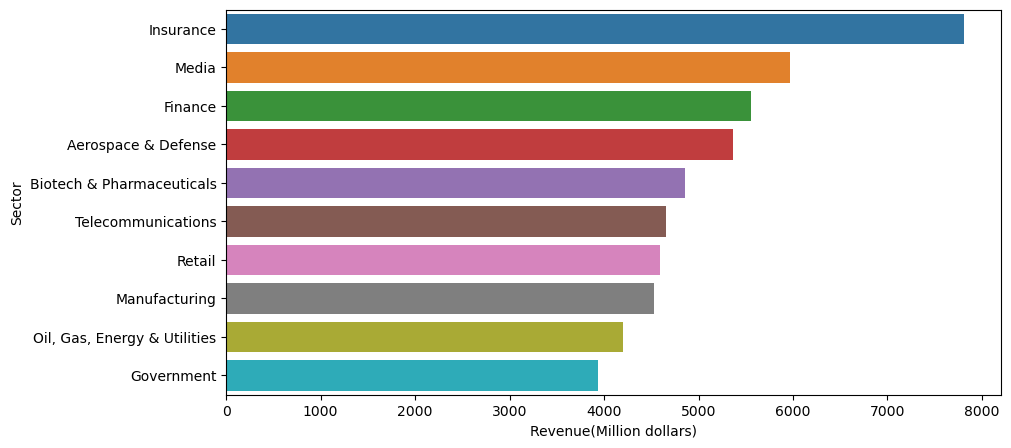

In [247]:
df2.reset_index(inplace=True)
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=df2,
    x='Revenue',
    y='Sector',
    orient ='h'
)

chart.set_yticklabels(
    chart.get_yticklabels(), 
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
 
)
chart.axes.xaxis.label.set_text("Revenue(Million dollars)")

# Ý nghĩa: qua phân tích ta thấy rất là nhiều lĩnh vực cần phân tích dữ liệu